# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras import models as ml
from keras import layers as l

from sklearn import preprocessing as pp
from sklearn import metrics as m
from sklearn import model_selection as ms

from xgboost import XGBClassifier

from scikitplot import metrics as mt

## 0.1 Importing Data

In [2]:
df_raw = pd.read_csv('D:\\My Drive\\Pessoal\\projetos\\airbnb_first_booking_predict\\data\\raw\\train_users_2.csv')
sessions = pd.read_csv('D:\\My Drive\\Pessoal\\projetos\\airbnb_first_booking_predict\\data\\raw\\sessions.csv')

## 0.2 Helper Functions

# 1.0 Data Description

In [3]:
df1 = df_raw.copy()

## 1.1 Looking Dataset

In [4]:
df1.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


* A data da criação da conta em alguns casos é posterior a data do primeiro booking

In [5]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


## 1.2 Data Dimension

In [6]:
print('Usuários')
print(f'Há: {df1.shape[0]} linhas no total')
print(f'Há: {df1.shape[1]} colunas no total')

Usuários
Há: 213451 linhas no total
Há: 16 colunas no total


In [7]:
print('Navegação')
print(f'Há: {sessions.shape[0]} linhas no total')
print(f'Há: {sessions.shape[1]} colunas no total')

Navegação
Há: 10567737 linhas no total
Há: 6 colunas no total


## 1.3 Datatypes

In [8]:
print('Usuários')
df1.dtypes

Usuários


id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [9]:
print('Navegação')
sessions.dtypes

Navegação


user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

## 1.4 Check Na

In [10]:
print('Usuários')
df1.isna().sum() 

Usuários


id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [11]:
print('Navegação')
sessions.isna().sum()

Navegação


user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

## 1.5 Filout Na

In [12]:
# remove missing value completly
df_qtd_base = df1.shape[0]
sessions_qtd_base = sessions.shape[0]

### date_first_booking

In [13]:
df1[df1['date_first_booking'].isna()]['country_destination'].value_counts()

NDF    124543
Name: country_destination, dtype: int64

In [14]:
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])
temp = df1['date_account_created'].max().strftime('%Y-%m-%d')
df1['date_first_booking'].fillna(temp, inplace=True)

### 1.4.2 age

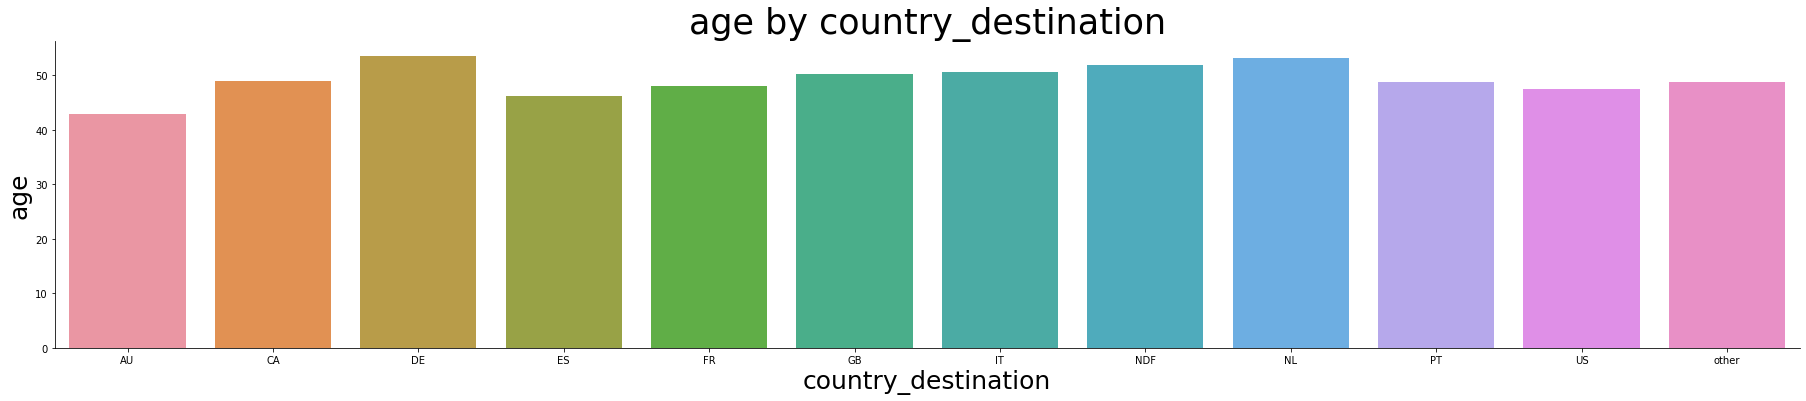

In [15]:
temp = df1.groupby('country_destination').agg({'age': 'mean'}).reset_index()
sns.catplot(data=temp, x='country_destination', y='age', kind='bar', aspect=5)
plt.title('age by country_destination', fontsize=35)
plt.xlabel('country_destination', fontsize=25)
plt.ylabel('age', fontsize=25);

A distribuição parece uniforme em todas as categorias de country_destination

D:\My Drive\Pessoal\environments\data_science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


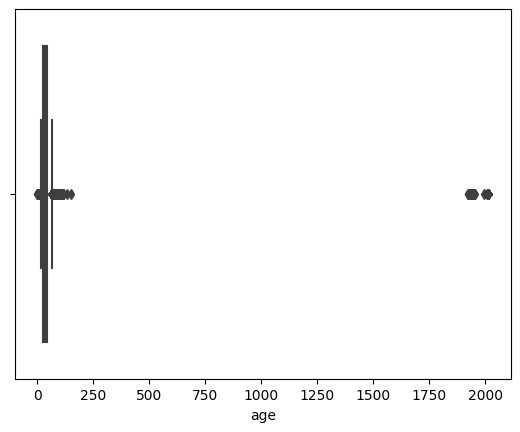

In [16]:
# plt.figure(figsize=(20, 5))
sns.boxplot(df1['age']);

Outliers com idade de 2000 anos, erros de input

In [17]:
print(f'Média = {df1["age"].mean()}')
print(f'Mediana = {df1["age"].median()}')

Média = 49.66833517985669
Mediana = 34.0


Bastante deslocadas por conta dos outliers

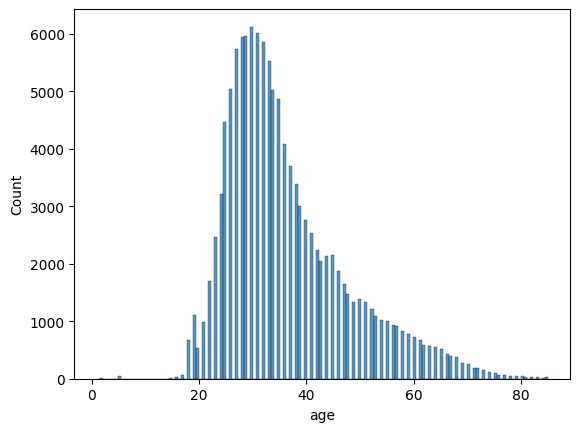

In [18]:
# plt.figure(figsize=(20, 5))
sns.histplot(df1.loc[df1['age']<=85, 'age']);

Parecida com uma NORMAL, apesar de possuir um SKEW POSITIVO (cauda direita mais pesada). Uma distribuição NORMAL com média e desvio padrão similares pode ser uma boa forma de substituição dos Nas

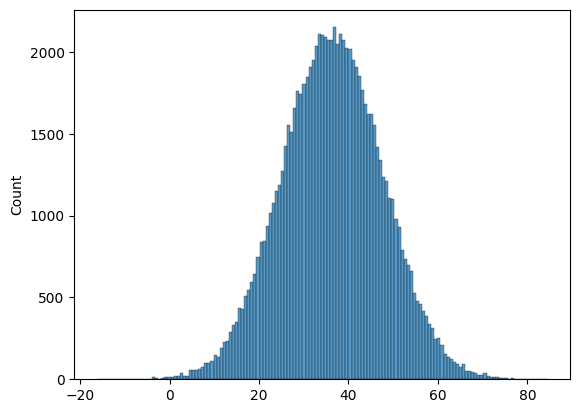

In [19]:
loc = df1.loc[df1['age']<=85, 'age'].mean()
scale = df1.loc[df1['age']<=85, 'age'].std()
size = temp = df1.loc[df1['age'].isna()]['id'].count()
random_norm_age = np.random.normal(loc=loc, scale=scale, size=size)

sns.histplot(random_norm_age);

In [20]:
df1.loc[df1['age'].isna(), 'age'] = random_norm_age

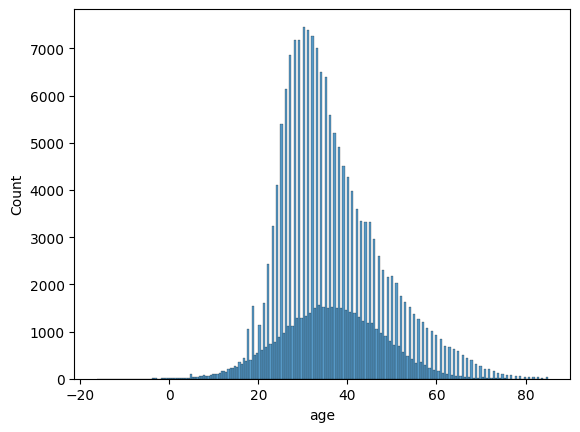

In [21]:
sns.histplot(df1.loc[df1['age']<=85, 'age']);

### 1.4.3 first_affiliate_tracked

In [22]:
df1['first_affiliate_tracked'].value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [23]:
df1[df1['first_affiliate_tracked'].isna()]['country_destination'].value_counts()

NDF      4327
US       1309
FR        124
other     113
IT         44
CA         37
ES         36
GB         29
DE         20
AU         12
NL         11
PT          3
Name: country_destination, dtype: int64

As amostras Nas estão dispesas em todas as categorias de países destinos. Droparemos os Nas

In [24]:
temp = df1[df1['first_affiliate_tracked'].isna()].index

df1.drop(temp, axis=0, inplace=True)

### 1.4.4 total drop missing values

In [25]:
print(f'Porcentagem da base removida: {round((df_qtd_base - df1.shape[0]) * 100/ df_qtd_base, 2)}%')

Porcentagem da base removida: 2.84%


## 1.5 Changing datatype

In [26]:
# date_account_created
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])
# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')
# date_first_booking
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])
# age
df1['age'] = df1['age'].astype(int)

## 1.6 Check Balanced Data

In [27]:
df1['country_destination'].value_counts(normalize=True)

NDF      0.579673
US       0.294461
other    0.048128
FR       0.023623
IT       0.013458
GB       0.011066
ES       0.010671
CA       0.006707
DE       0.005020
NL       0.003621
AU       0.002541
PT       0.001032
Name: country_destination, dtype: float64

## 1.7 Descriptive Statistic

# 2.0 Feature Engineering

In [10]:
df2 = df1.copy()

# 3.0 Exploratory Data Analysis

In [11]:
df3 = df2.copy()

# 4.0 Data Filtering

In [12]:
df4 = df3.copy()

## 4.1 Filtering Rows

## 4.2 Columns Selection

# 5.0 Data Preparation

In [13]:
df5 = df4.copy()

## 5.1 Preprocessing

In [14]:
X = df5.drop(['id', 'country_destination'], axis=1)
y = df5['country_destination']
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=100)

## 5.2 Target

## 5.3 Features

### 5.3.1 Encodings

In [15]:
cat_attributes = df5.drop(['id', 'country_destination'], axis=1).select_dtypes(exclude=[int, float, 'datetime64[ns]']).columns.to_list()

temp = pd.get_dummies(df5[cat_attributes])

df5 = pd.concat([df5, temp], axis=1).drop(cat_attributes, axis=1)

# 6.0 Feature Selection

In [16]:
df6 = df5.copy()

In [17]:
cols_drop = 'date_account_created timestamp_first_active date_first_booking'.split()
df6.drop(cols_drop, axis=1, inplace=True)

# 7.0 Machine Learning Modeling

In [18]:
df7 = df6.copy()

## 7.1 Preprocessing

In [19]:
X = df7.drop(['id', 'country_destination'], axis=1)
y = df7['country_destination']

## 7.2 Models

### 7.2.1 Baseline Model

Accuracy: 0.5218921892189219
Balanced Accuracy: 0.09208661329805738
Kappa Score : 0.006222379511518494

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        83
          CA       0.02      0.02      0.02       234
          DE       0.02      0.02      0.02       158
          ES       0.01      0.02      0.01       331
          FR       0.06      0.06      0.06       724
          GB       0.03      0.02      0.03       385
          IT       0.03      0.03      0.03       423
          NL       0.02      0.02      0.02       129
          PT       0.00      0.00      0.00        28
          US       0.71      0.72      0.71      9590
       other       0.12      0.12      0.12      1550

    accuracy                           0.52     13635
   macro avg       0.09      0.09      0.09     13635
weighted avg       0.52      0.52      0.52     13635



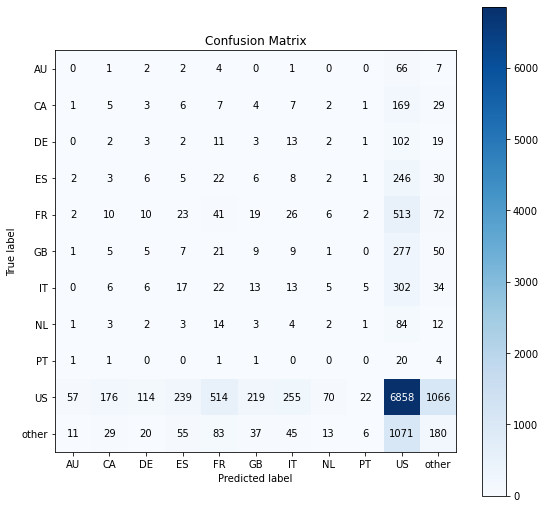

In [20]:
# train test split
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=100)

# random y_hat weighted
p = y_train.value_counts(normalize=True).sort_index().values
a = y_train.drop_duplicates().sort_index().sort_values()
y_hat = np.random.choice(a=a, size=len(y_test), p=p)

# metrics
acc = m.accuracy_score(y_test, y_hat)
balanced_acc = m.balanced_accuracy_score(y_test, y_hat)
kappa = m.cohen_kappa_score(y_test, y_hat)

print(f'Accuracy: {acc}')
print(f'Balanced Accuracy: {balanced_acc}')
print(f'Kappa Score : {kappa}')
print('')
print(f'{m.classification_report(y_test, y_hat)}')

mt.plot_confusion_matrix(y_test, y_hat, normalize=False, figsize=(9, 9));

### 7.2.2 Neural Network MLP

#### 7.2.2.1 Neural Network Single Validation

427/427 [==============================] - 1s 2ms/step
Accuracy: 0.7031903190319032
Balanced Accuracy: 0.09145602618761632
Kappa Score : 0.0004978777478733543



D:\My Drive\Pessoal\environments\data_science\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Drive\Pessoal\environments\data_science\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Drive\Pessoal\environments\data_science\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        83
          CA       0.00      0.00      0.00       234
          DE       1.00      0.01      0.01       158
          ES       0.00      0.00      0.00       331
          FR       0.00      0.00      0.00       724
          GB       0.00      0.00      0.00       385
          IT       0.00      0.00      0.00       423
          NL       0.00      0.00      0.00       129
          PT       0.00      0.00      0.00        28
          US       0.70      1.00      0.83      9590
       other       0.00      0.00      0.00      1550

    accuracy                           0.70     13635
   macro avg       0.15      0.09      0.08     13635
weighted avg       0.51      0.70      0.58     13635



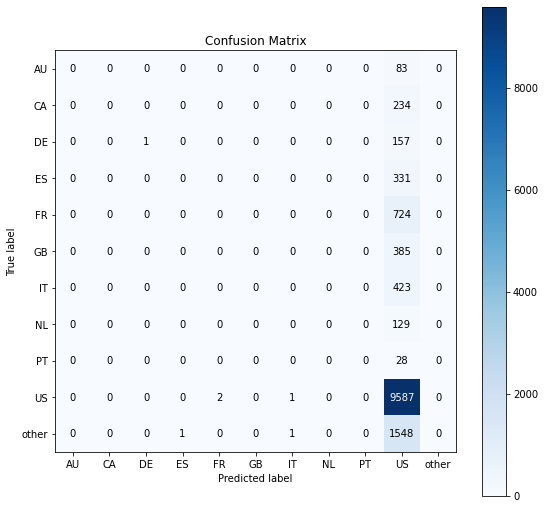

In [21]:
# train test split
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=100)

# encoding y
ohe = pp.OneHotEncoder()
ohe_y = ohe.fit(y.values.reshape(-1, 1))
y_train_nn = ohe_y.transform(y_train.values.reshape(-1, 1)).toarray()

# model definition
nn_model = ml.Sequential()
nn_model.add(l.Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(l.Dense(11, activation='softmax'))

# model compile
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

# fiting model
nn_model.fit(X_train, y_train_nn, epochs=30, verbose=0, batch_size=32)

# predicting
y_hat = nn_model.predict(X_test)

# formating
y_hat = ohe.inverse_transform(y_hat)
y_hat = y_hat.reshape(1, -1)[0]
y_test_nn = y_test.to_numpy()

# metrics
acc = m.accuracy_score(y_test_nn, y_hat)
balanced_acc = m.balanced_accuracy_score(y_test_nn, y_hat)
kappa = m.cohen_kappa_score(y_test_nn, y_hat)
    
# prints
print(f'Accuracy: {acc}')
print(f'Balanced Accuracy: {balanced_acc}')
print(f'Kappa Score : {kappa}')
print('')
print(f'{m.classification_report(y_test_nn, y_hat)}')
mt.plot_confusion_matrix(y_test_nn, y_hat, normalize=False, figsize=(9, 9));

#### 7.2.2.2 Neural Network Crossvalidation

In [22]:
acc_list, balanced_acc_list, kappa_list = [], [], []

num_folds = 5
i = 1
skf = ms.StratifiedKFold(n_splits= num_folds, random_state=100, shuffle=True)

for train_index, test_index in skf.split(X, y):
    
    # get fold
    X_train_fold = X.iloc[train_index]
    y_train_fold = y.iloc[train_index]
    
    X_test_fold = X.iloc[test_index]
    y_test_fold = y.iloc[test_index]
  

    # encoding y
    y_train_fold = ohe_y.transform(y_train_fold.values.reshape(-1, 1)).toarray()
    
    # model definition
    nn_model = ml.Sequential()
    nn_model.add(l.Dense(128, input_dim=X_train_fold.shape[1], activation='relu'))
    nn_model.add(l.Dense(11, activation='softmax'))

    # model compile
    nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

    # fiting model
    nn_model.fit(X_train_fold, y_train_fold, epochs=30, verbose=0, batch_size=32)

    # predicting
    y_hat = nn_model.predict(X_test_fold)

    # formating
    y_hat = ohe_y.inverse_transform(y_hat)
    y_hat = y_hat.reshape(1, -1)[0]
    y_test_fold = y_test_fold.to_numpy()
    
    # metrics
    acc = m.accuracy_score(y_test_fold, y_hat)
    acc_list.append(acc)
    balanced_acc = m.balanced_accuracy_score(y_test_fold, y_hat)
    balanced_acc_list.append(balanced_acc)
    kappa = m.cohen_kappa_score(y_test_fold, y_hat)
    kappa_list.append(kappa)
    
    # prints
    print(f'Fold Number: {i}')
    print(f'Balanced Accuracy: {balanced_acc}')
    print(f'Kappa Score : {kappa}\n')
    i += i

427/427 [==============================] - 1s 2ms/step
Fold Number: 1
Balanced Accuracy: 0.09149452376279021
Kappa Score : 0.0026940329605565916

427/427 [==============================] - 1s 2ms/step
Fold Number: 2
Balanced Accuracy: 0.0919395727562843
Kappa Score : 0.001695524107986679

427/427 [==============================] - 1s 2ms/step
Fold Number: 4
Balanced Accuracy: 0.0912947651474735
Kappa Score : 0.001440382249631389

427/427 [==============================] - 1s 2ms/step
Fold Number: 8
Balanced Accuracy: 0.09114745733649988
Kappa Score : 0.0008867002293695414

427/427 [==============================] - 1s 2ms/step
Fold Number: 16
Balanced Accuracy: 0.09088086995785671
Kappa Score : -9.971847486078822e-05



### 7.2.1 XGBoost Classifier

#### 7.2.3.1 XGBoost Classifier Sigle Validation

In [23]:
# # encoding y
# le_y = pp.LabelEncoder().fit(y)

# y_train_le = le_y.transform(y_train)
# y_test_le = le_y.transform(y_test)

# # model defition
# xgb_model = XGBClassifier()

# # fiting model
# xgb_fit = xgb_model.fit(X_train, y_train_le)

# # predicting
# y_hat = xgb_fit.predict(X_test)

# # formating
# y_hat = le_y.inverse_transform(y_hat)

# # metrics
# acc = m.accuracy_score(y_test, y_hat)
# balanced_acc = m.balanced_accuracy_score(y_test, y_hat)
# kappa = m.cohen_kappa_score(y_test, y_hat)
    
# # prints
# print(f'Accuracy: {acc}')
# print(f'Balanced Accuracy: {balanced_acc}')
# print(f'Kappa Score : {kappa}')
# print('')
# print(f'{m.classification_report(y_test, y_hat)}');

# mt.plot_confusion_matrix(y_test, y_hat, normalize=False, figsize=(9, 9));

#### 7.2.3.2 XGBoost Classifier Crossvalidation

In [24]:
# acc_list, balanced_acc_list, kappa_list = [], [], []

# num_folds = 5
# i = 1
# skf = ms.StratifiedKFold(n_splits= num_folds, random_state=100, shuffle=True)

# for train_index, test_index in skf.split(X, y):
    
#     # get fold
#     X_train_fold = X.iloc[train_index]
#     y_train_fold = y.iloc[train_index]
    
#     X_test_fold = X.iloc[test_index]
#     y_test_fold = y.iloc[test_index]
    
#     # encoding y
#     y_train_fold_le = le_y.transform(y_train_fold)
    
#     # model defition
#     xgb_model = XGBClassifier()
    
#     # fiting model
#     xgb_fit = xgb_model.fit(X_train_fold, y_train_fold_le)

#     # predicting
#     y_hat = xgb_fit.predict(X_test_fold)
    
#     # formating
#     y_hat = le_y.inverse_transform(y_hat)
    
#     # metrics
#     acc = m.accuracy_score(y_test_fold, y_hat)
#     acc_list.append(acc)
#     balanced_acc = m.balanced_accuracy_score(y_test_fold, y_hat)
#     balanced_acc_list.append(balanced_acc)
#     kappa = m.cohen_kappa_score(y_test_fold, y_hat)
#     kappa_list.append(kappa)
    

#     # prints
#     print(f'Fold Number: {i}')
#     print(f'Balanced Accuracy: {balanced_acc}')
#     print(f'Kappa Score : {kappa}\n')
#     i += i

# 8.0 Model Performance

## 8.1 Machine Learning Performance